In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_labels(boxes, confs, colors, class_ids, classes, img): 
        indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
        font = cv2.FONT_HERSHEY_PLAIN
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                color = colors[i]
                cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
                cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
        return img

def get_box_dimensions(outputs, height, width):
    boxes = []
    confs = []
    class_ids = []
    for output in outputs:
        for detect in output:
            scores = detect[5:]
            class_id = np.argmax(scores)
            conf = scores[class_id]
            if conf > 0.8:
                center_x = int(detect[0] * width)
                center_y = int(detect[1] * height)
                w = int(detect[2] * width)
                h = int(detect[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confs.append(float(conf))
                class_ids.append(class_id)

    return boxes, confs, class_ids

### YOLO Setup

In [3]:
model = cv2.dnn.readNet("weights/yolov3.weights", "cfg/yolov3.cfg")
classes = [line.strip() for line in open("cfg/coco.names", "r").readlines()]
layers_names = model.getLayerNames()
output_layers = [layers_names[i[0]-1] for i in model.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

### Label a Picture

([392, 139, 208, 206], 0.9957253932952881, 17)
([389, 133, 214, 213], 0.9943549036979675, 17)
([401, 133, 227, 214], 0.9118556380271912, 17)
([388, 145, 220, 229], 0.9236875176429749, 17)
([66, 256, 164, 102], 0.9601488709449768, 16)
([175, 85, 91, 285], 0.8997886180877686, 0)
([189, 87, 86, 284], 0.9996199011802673, 0)
([175, 88, 94, 296], 0.9047670960426331, 0)
([187, 91, 89, 289], 0.9996459484100342, 0)
([400, 138, 187, 210], 0.8714110851287842, 17)
([53, 267, 145, 78], 0.8874695897102356, 16)
([67, 266, 137, 81], 0.9977372288703918, 16)
([68, 258, 135, 100], 0.8369303345680237, 16)


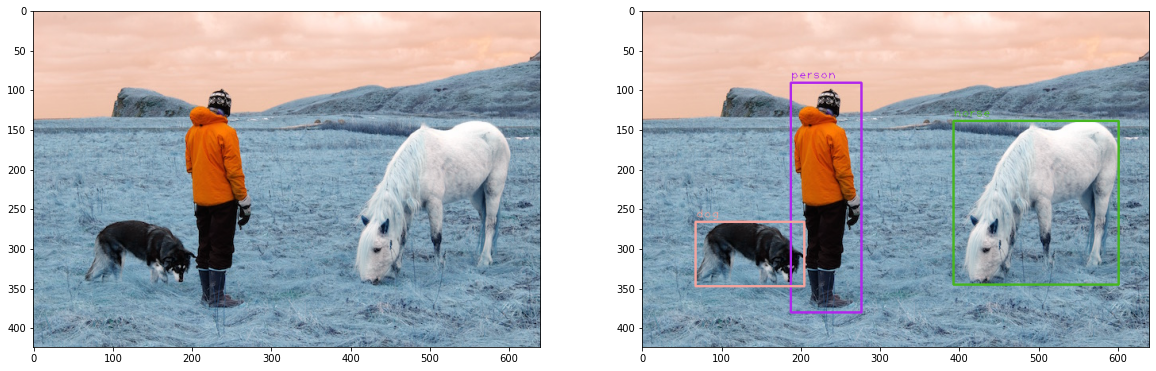

In [8]:
image = cv2.imread("materials/person.jpg")
img = cv2.resize(image, None, fx=1, fy=1)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img,
                             scalefactor=0.00392,
                             size=(320, 320),
                             mean=(0, 0, 0),
                             swapRB=True,
                             crop=False)
model.setInput(blob)
outputs = model.forward(output_layers)
# print(outputs)
boxes, confs, class_ids = get_box_dimensions(outputs, height, width)

[print(_) for _ in zip(boxes, confs, class_ids)]
 
img_with_labels = draw_labels(boxes, confs, colors, class_ids, classes, img)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img_with_labels)
plt.show()

### Label a Video

In [ ]:
from IPython.display import Video

Video("materials/driving_record.mp4", width=480)

In [ ]:
cap = cv2.VideoCapture("materials/driving_record.mp4")
while True:
    _, frame = cap.read()
    img = cv2.resize(frame, None, fx=0.2, fy=0.2)
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
    model.setInput(blob)
    outputs = model.forward(output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    img_with_labels = draw_labels(boxes, confs, colors, class_ids, classes, img)
    cv2.imshow('', img_with_labels)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()

### Label video stream from your camera

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    img = cv2.resize(frame, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
    model.setInput(blob)
    outputs = model.forward(output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    img = draw_labels(boxes, confs, colors, class_ids, classes, img)
    cv2.imshow('',img)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()